<a href="https://colab.research.google.com/github/NazarZhur/KSVD/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 9. PySpark

[Посилання на GitHub]()

In [1]:
!pip install pyspark==3.5.1

In [2]:
from pyspark.sql import SparkSession

# Створення SparkSession
spark = SparkSession.builder\
    .master("local[*]")\
    .appName("Colab_PySpark")\
    .getOrCreate()

1) Завантжатити датасет https://www.kaggle.com/datasets/soheiltehranipour/cruise-used-for-pyspark

In [3]:
from google.colab import files
uploaded = files.upload()

Saving cruise_dataset.csv to cruise_dataset.csv


In [4]:
data = spark.read.csv(
    "cruise_dataset.csv",
    sep=",",
    header=True,
    inferSchema=True
)

data.printSchema() # Відображає схему даних

root
 |-- Ship_name: string (nullable = true)
 |-- Cruise_line: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tonnage: double (nullable = true)
 |-- passengers: double (nullable = true)
 |-- length: double (nullable = true)
 |-- cabins: double (nullable = true)
 |-- passenger_density: double (nullable = true)
 |-- crew: double (nullable = true)



2) Виконати основні функції для спарк

In [5]:
data.schema # повертає схему даних

StructType([StructField('Ship_name', StringType(), True), StructField('Cruise_line', StringType(), True), StructField('Age', IntegerType(), True), StructField('Tonnage', DoubleType(), True), StructField('passengers', DoubleType(), True), StructField('length', DoubleType(), True), StructField('cabins', DoubleType(), True), StructField('passenger_density', DoubleType(), True), StructField('crew', DoubleType(), True)])

Список кортежів з іменами стовпців і типами даних

In [6]:
data.dtypes # список кортежів з іменами стовпців і типами даних

[('Ship_name', 'string'),
 ('Cruise_line', 'string'),
 ('Age', 'int'),
 ('Tonnage', 'double'),
 ('passengers', 'double'),
 ('length', 'double'),
 ('cabins', 'double'),
 ('passenger_density', 'double'),
 ('crew', 'double')]

In [7]:
data.head(5) #  3 рядки у вигляді списку

[Row(Ship_name='Journey', Cruise_line='Azamara', Age=6, Tonnage=30.276999999999997, passengers=6.94, length=5.94, cabins=3.55, passenger_density=42.64, crew=3.55),
 Row(Ship_name='Quest', Cruise_line='Azamara', Age=6, Tonnage=30.276999999999997, passengers=6.94, length=5.94, cabins=3.55, passenger_density=42.64, crew=3.55),
 Row(Ship_name='Celebration', Cruise_line='Carnival', Age=26, Tonnage=47.262, passengers=14.86, length=7.22, cabins=7.43, passenger_density=31.8, crew=6.7),
 Row(Ship_name='Conquest', Cruise_line='Carnival', Age=11, Tonnage=110.0, passengers=29.74, length=9.53, cabins=14.88, passenger_density=36.99, crew=19.1),
 Row(Ship_name='Destiny', Cruise_line='Carnival', Age=17, Tonnage=101.353, passengers=26.42, length=8.92, cabins=13.21, passenger_density=38.36, crew=10.0)]

In [8]:
data.show() # перші 20 рядків

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|
|    Ecstasy|   Carnival| 22|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Elation|   Carnival| 15|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Fantasy|   Carnival| 23| 

In [9]:
data.first() # перший рядок даних

Row(Ship_name='Journey', Cruise_line='Azamara', Age=6, Tonnage=30.276999999999997, passengers=6.94, length=5.94, cabins=3.55, passenger_density=42.64, crew=3.55)

In [10]:
data.take(3) #  перші 3 рядки

[Row(Ship_name='Journey', Cruise_line='Azamara', Age=6, Tonnage=30.276999999999997, passengers=6.94, length=5.94, cabins=3.55, passenger_density=42.64, crew=3.55),
 Row(Ship_name='Quest', Cruise_line='Azamara', Age=6, Tonnage=30.276999999999997, passengers=6.94, length=5.94, cabins=3.55, passenger_density=42.64, crew=3.55),
 Row(Ship_name='Celebration', Cruise_line='Carnival', Age=26, Tonnage=47.262, passengers=14.86, length=7.22, cabins=7.43, passenger_density=31.8, crew=6.7)]

In [11]:
data.describe()

DataFrame[summary: string, Ship_name: string, Cruise_line: string, Age: string, Tonnage: string, passengers: string, length: string, cabins: string, passenger_density: string, crew: string]

In [12]:
data.columns # список, що містить назви стовпців

['Ship_name',
 'Cruise_line',
 'Age',
 'Tonnage',
 'passengers',
 'length',
 'cabins',
 'passenger_density',
 'crew']

In [13]:
data.count() # загальна кількість рядків

158

In [14]:
data.distinct()

DataFrame[Ship_name: string, Cruise_line: string, Age: int, Tonnage: double, passengers: double, length: double, cabins: double, passenger_density: double, crew: double]

In [15]:
from pyspark.sql.functions import col

# Додавання стовпчика
data = data.withColumn("avg_ship_space", col("length") * col("Tonnage") / col("passengers"))

data.show(5)

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+------------------+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|    avg_ship_space|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+------------------+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|25.914319884726225|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|25.914319884726225|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|22.963098250336472|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|  35.2488231338265|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|34.219105223315665|
+-----------+-----------+---+------------------+----------+------+------

In [16]:
# Оновлення колонки
data = data.withColumnRenamed("Tonnage", "tonnage")

data.show(5)

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+------------------+
|  Ship_name|Cruise_line|Age|           tonnage|passengers|length|cabins|passenger_density|crew|    avg_ship_space|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+------------------+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|25.914319884726225|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|25.914319884726225|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|22.963098250336472|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|  35.2488231338265|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|34.219105223315665|
+-----------+-----------+---+------------------+----------+------+------

In [17]:
# Видалення стовпця
# data = data.drop("")

In [18]:
from pyspark.sql.functions import mean

# видалити рядки з відсутніми значеннями
# data = data.na.drop()

# Заміна пропущених значень середнім
data = data.na.fill({"tonnage": data.select(mean(col("tonnage"))).collect()[0][0]})

data.show(5)

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+------------------+
|  Ship_name|Cruise_line|Age|           tonnage|passengers|length|cabins|passenger_density|crew|    avg_ship_space|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+------------------+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|25.914319884726225|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|25.914319884726225|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|22.963098250336472|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|  35.2488231338265|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|34.219105223315665|
+-----------+-----------+---+------------------+----------+------+------

In [19]:
# вибір одного або декількох стовпчиків
data.select(["tonnage", "crew", "length"]).show(5)

+------------------+----+------+
|           tonnage|crew|length|
+------------------+----+------+
|30.276999999999997|3.55|  5.94|
|30.276999999999997|3.55|  5.94|
|            47.262| 6.7|  7.22|
|             110.0|19.1|  9.53|
|           101.353|10.0|  8.92|
+------------------+----+------+
only showing top 5 rows



In [20]:
# фільтрує дані на основі заданої умови
data.filter(
    (col("Age") > 20) | (col("tonnage").between(30, 70))
).show(5)

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+------------------+
|  Ship_name|Cruise_line|Age|           tonnage|passengers|length|cabins|passenger_density|crew|    avg_ship_space|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+------------------+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|25.914319884726225|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|25.914319884726225|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|22.963098250336472|
|    Ecstasy|   Carnival| 22|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|29.319583333333338|
|    Fantasy|   Carnival| 23|            70.367|     20.56|  8.55| 10.22|            34.23| 9.2|29.262541342412458|
+-----------+-----------+---+------------------+----------+------+------

In [21]:
# повертає 0 або 1 залежно від вказаної умови


In [22]:
from pyspark.sql import functions as f

data.select("Ship_name", "crew", f.when(col("crew") > 11, 1).otherwise(0).alias("large_crew")).show(5)

+-----------+----+----------+
|  Ship_name|crew|large_crew|
+-----------+----+----------+
|    Journey|3.55|         0|
|      Quest|3.55|         0|
|Celebration| 6.7|         0|
|   Conquest|19.1|         1|
|    Destiny|10.0|         0|
+-----------+----+----------+
only showing top 5 rows



In [23]:
data.filter(col("Ship_name").rlike("^[Q|R]")).show(5)

+----------------+-----------+---+------------------+----------+------+------+-----------------+-----+------------------+
|       Ship_name|Cruise_line|Age|           tonnage|passengers|length|cabins|passenger_density| crew|    avg_ship_space|
+----------------+-----------+---+------------------+----------+------+------+-----------------+-----+------------------+
|           Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64| 3.55|25.914319884726225|
|       Romantica|      Costa| 20|            53.049|     13.44|  7.22|  6.78|            39.47|  6.0|28.498049107142858|
|QueenElizabethII|     Cunard| 44|            70.327|     17.91|  9.63|   9.5|            39.27| 9.21|37.814015075376886|
|      QueenMary2|     Cunard| 10|             151.4|      26.2| 11.32| 11.34|            57.79|12.53| 65.41404580152673|
|   QueenVictoria|     Cunard|  6|              90.0|      20.0|  9.64| 10.29|             45.0|  9.0|             43.38|
+----------------+------

In [24]:
data.groupBy("Cruise_line").mean("crew").show()

+-----------------+------------------+
|      Cruise_line|         avg(crew)|
+-----------------+------------------+
|            Costa|               7.7|
|              P&O| 8.588333333333333|
|           Cunard|10.246666666666668|
|Regent_Seven_Seas|             3.146|
|              MSC|              7.54|
|         Carnival| 10.13590909090909|
|          Crystal|             5.905|
|           Orient|               3.5|
|         Princess|  9.32235294117647|
|        Silversea|            2.4725|
|         Seabourn|1.6000000000000003|
| Holland_American| 6.215000000000002|
|         Windstar|1.1866666666666668|
|           Disney|              9.45|
|        Norwegian| 8.087692307692308|
|          Oceania|               4.0|
|          Azamara|              3.55|
|        Celebrity|             8.072|
|             Star| 5.363333333333333|
|  Royal_Caribbean|10.016521739130434|
+-----------------+------------------+



In [25]:
data.filter((col("Age") > 20) | (col("tonnage").between(50, 70))) \
.groupBy("Cruise_line") \
.agg(
    f.min("Age").alias("Мінімальний вік"),
    f.max("Age").alias("Максимальний вік"),
    f.avg("Age").alias("Середній вік"),

    f.min("tonnage").alias("Мінімальний тоннаж"),
    f.max("tonnage").alias("Максимальний тоннаж"),
    f.avg("tonnage").alias("Середній тоннаж"),

    ).show(truncate=False)

+-----------------+---------------+----------------+------------------+------------------+-------------------+------------------+
|Cruise_line      |Мінімальний вік|Максимальний вік|Середній вік      |Мінімальний тоннаж|Максимальний тоннаж|Середній тоннаж   |
+-----------------+---------------+----------------+------------------+------------------+-------------------+------------------+
|Costa            |20             |27              |22.6              |25.0              |53.872             |42.6554           |
|P&O              |18             |29              |23.5              |45.0              |69.153             |57.0765           |
|Cunard           |44             |44              |44.0              |70.327            |70.327             |70.327            |
|Regent_Seven_Seas|12             |27              |19.5              |12.5              |50.0               |31.25             |
|MSC              |9              |36              |18.166666666666668|16.852            |

3) Побудувати 3 графіки

In [26]:
from matplotlib import pyplot as plt

df = data.toPandas()
df.head(3)

,Ship_name,Cruise_line,Age,tonnage,passengers,length,cabins,passenger_density,crew,avg_ship_space
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55,25.914320
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55,25.914320
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70,22.963098


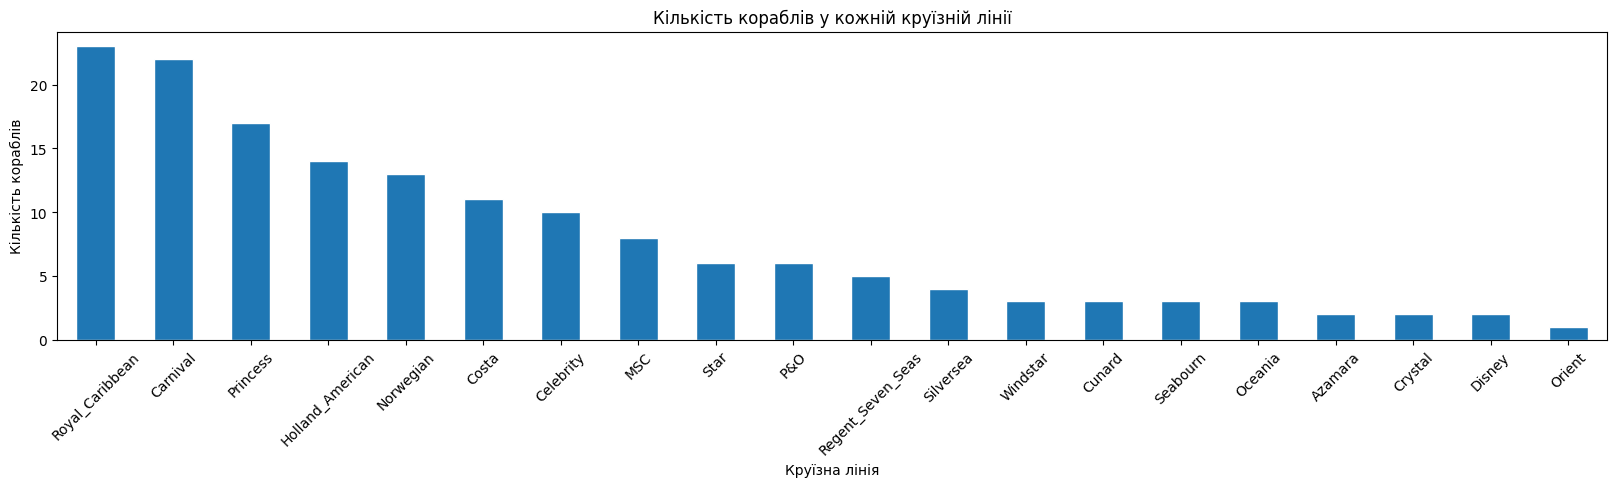

In [27]:
ship_counts = df.groupby('Cruise_line')['Ship_name'].count().sort_values(ascending=False)

plt.figure(figsize=(20, 4))

ship_counts.plot(kind='bar', edgecolor='white')

plt.title('Кількість кораблів у кожній круїзній лінії')
plt.xlabel('Круїзна лінія')
plt.ylabel('Кількість кораблів')
plt.xticks(rotation=45)
plt.show()

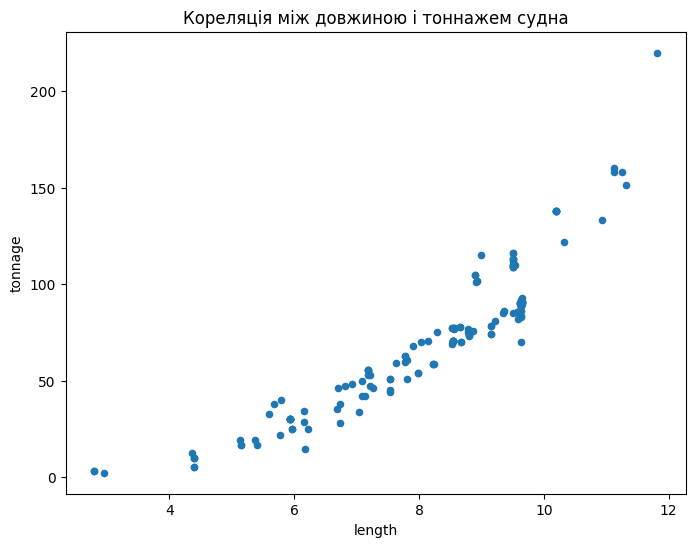

In [28]:
df.plot(kind='scatter', x='length', y='tonnage', figsize=(8, 6))
plt.title('Кореляція між довжиною і тоннажем судна')
plt.show()